<a href="https://colab.research.google.com/github/Yi-Wei-Lin/Tibame_ML_20210602/blob/main/cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
names = ["ariplane",
      "automobile",
      "bird",
      "cat",
      "deer",
      "dog",
      "frog",
      "horse",
      "ship",
      "truck"
      ]

dog


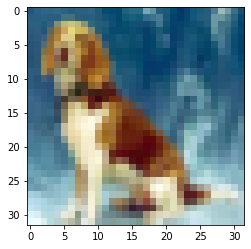

In [4]:
# mnist: (60000, ) [5,2,1,0]
import matplotlib.pyplot as plt
import random
idx = random.randint(0,49999)
ans = y_train[idx][0]
print(names[ans])
plt.imshow(x_train[idx])

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
layers = [
  # 3 * 3 * 3(一個) * 64 + 64(bias) = 1792
  Conv2D(64,3, activation="relu", padding="same", input_shape=(32,32,3)),
  MaxPooling2D(),
  # 3 * 3 * 64(一個) * 128 + 128(bias) =  73856
  Conv2D(128,3, activation="relu", padding="same"),
  MaxPooling2D(),
  Conv2D(256,3, activation="relu", padding="same"),
  MaxPooling2D(),
  Conv2D(512,3, activation="relu", padding="same"),
  MaxPooling2D(),
  Conv2D(512,3, activation="relu", padding="same"),
  MaxPooling2D(),
  Flatten(),
  Dense(256, activation="relu"),
  # 128 * 10 + 10(bias) = 1290
  Dropout(0.25),
  Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 4, 4, 512)        

In [33]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
        optimizer=Adam(),
        metrics=["accuracy"])

In [34]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [35]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# validation_split : 切出一些驗證資料來做驗證(0.1:54000筆資料訓練)
# epochs: 看幾輪(10輪: 54000 * 10)
# batch_size: 看了多少筆再做一次梯度調整(看圖片大小, 圖片小:200, 圖片大:20)
# 200batch, 10epochs: 54000 * 10 / 200 -> 2700次(梯度調整)
# verbose: 0(無聲) 1(最詳細) 2(沒有進度條)
callback = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cnn.h5", save_best_only=True)
]
model.fit(x_train_norm,
      y_train,
      validation_split=0.1,
      epochs=30,
      batch_size=200,
      verbose=2,
      callbacks=callback)

Epoch 1/30
225/225 - 7s - loss: 1.6830 - accuracy: 0.3655 - val_loss: 1.3147 - val_accuracy: 0.5272
Epoch 2/30
225/225 - 6s - loss: 1.1732 - accuracy: 0.5772 - val_loss: 1.0979 - val_accuracy: 0.6042
Epoch 3/30
225/225 - 6s - loss: 0.8970 - accuracy: 0.6846 - val_loss: 0.7908 - val_accuracy: 0.7206
Epoch 4/30
225/225 - 6s - loss: 0.7320 - accuracy: 0.7463 - val_loss: 0.7238 - val_accuracy: 0.7468
Epoch 5/30
225/225 - 6s - loss: 0.5933 - accuracy: 0.7939 - val_loss: 0.7129 - val_accuracy: 0.7570
Epoch 6/30
225/225 - 6s - loss: 0.4809 - accuracy: 0.8346 - val_loss: 0.6710 - val_accuracy: 0.7804
Epoch 7/30
225/225 - 6s - loss: 0.3822 - accuracy: 0.8684 - val_loss: 0.6690 - val_accuracy: 0.7910
Epoch 8/30
225/225 - 6s - loss: 0.2750 - accuracy: 0.9058 - val_loss: 0.7301 - val_accuracy: 0.7866
Epoch 9/30
225/225 - 6s - loss: 0.2114 - accuracy: 0.9266 - val_loss: 0.7615 - val_accuracy: 0.7830
Epoch 10/30
225/225 - 6s - loss: 0.1662 - accuracy: 0.9438 - val_loss: 0.9426 - val_accuracy: 0.7712

In [36]:
model.evaluate(x_test_norm, y_test) # 測試資料預測

313/313 [==============================] - 2s 4ms/step - loss: 0.7267 - accuracy: 0.7754


[0.7266954779624939, 0.7753999829292297]

In [44]:
print(y_test.shape)
print(pre.shape)
# -1:叫他幫你算 10000*1 = -1(?)
y_test_r = y_test.reshape(-1)
print(y_test_r.shape)

(10000, 1)
(10000,)
(10000,)


In [46]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# predict_proba -> predict
# predict -> predict_classes
# model.predict(x_test_norm)
pre = model.predict_classes(x_test_norm)
# 只要在 tensorflow: 就帶 one-hot -> y_test_cat
# 不在: 帶原本 -> y_test
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat,
      columns=["{}(預測)".format(names[i]) for i in range(10)],
      index=["{}(正確)".format(names[i]) for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,ariplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
ariplane(正確),772,9,53,13,15,4,7,11,79,37
automobile(正確),16,858,9,6,1,7,7,3,24,69
bird(正確),47,1,726,38,67,44,42,21,9,5
cat(正確),25,6,89,600,59,126,52,20,13,10
deer(正確),11,3,73,37,757,23,29,60,6,1
dog(正確),11,2,57,159,42,659,20,34,11,5
frog(正確),4,3,42,50,35,15,843,2,4,2
horse(正確),14,3,45,41,54,47,2,788,2,4
ship(正確),20,13,19,15,7,4,2,2,908,10
truck(正確),20,51,14,19,2,6,8,6,31,843


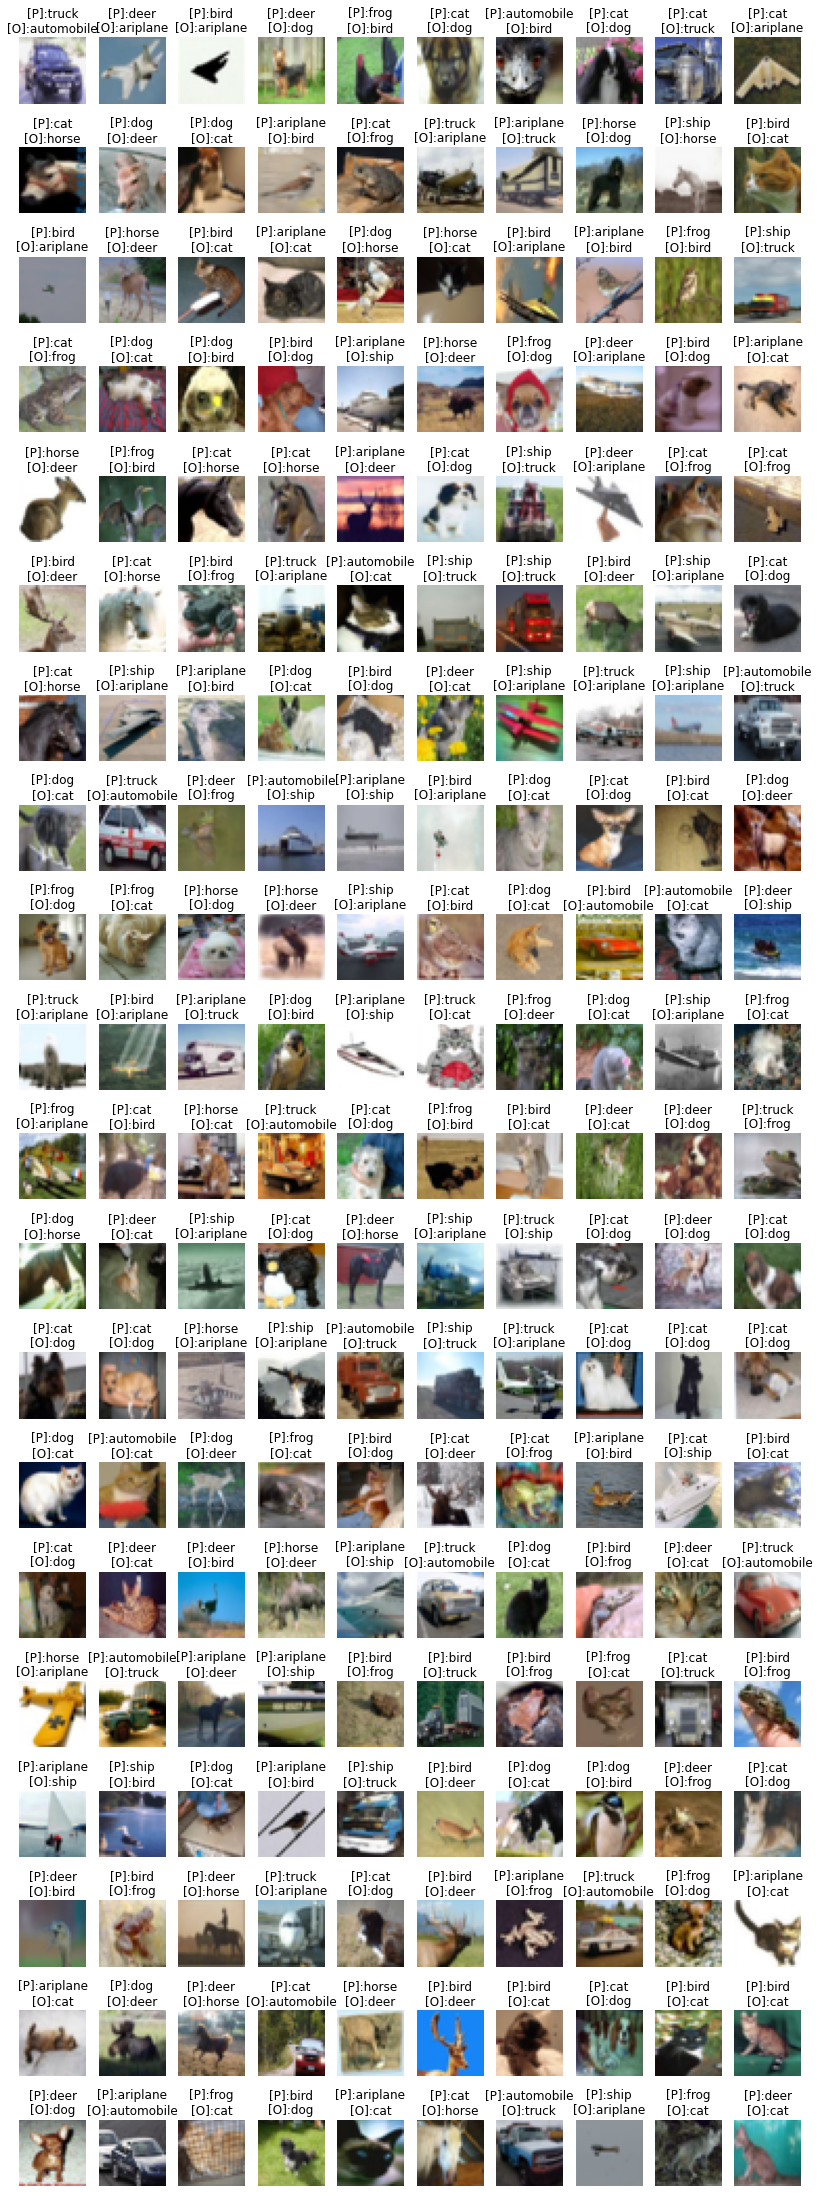

In [49]:
import numpy as np
import matplotlib.pyplot as plt
np.nonzero([[0,2,0],  # 判斷第幾個list,第幾個位置zero
      [0,0,3]])
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]
false_pre = pre[idx]
false_label = y_test_r[idx]
false_img = x_test[idx]

plt.figure(figsize=(14,42))
width = 10
height= len(idx) // width + 1
for i in range(len(false_img)):
  plt.subplot(height, width, i+1)
  title = "[P]:{}\n[O]:{}".format(names[false_pre[i]], names[false_label[i]])
  plt.title(title)
  plt.axis("off")
  plt.imshow(false_img[i])